<a href="https://colab.research.google.com/github/1Un/I_am_a_Professional_Olympiad_2020_2021_ML/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
!pip install chemparse

  Created wheel for chemparse: filename=chemparse-0.1.0-cp36-none-any.whl size=2913 sha256=37a6ee2593a55bb672f8098b0774f1392adf355cc245a547475f21600af8152e
  Stored in directory: /root/.cache/pip/wheels/6d/14/a5/1fee5885ee2793f331fe97ce98392ab4ee79b02147bbb4a59d
Successfully built chemparse


In [47]:
import pandas as pd
import numpy as np
import re
import regex
import chemparse
import os
import matplotlib.pyplot as plt


In [48]:
dir='/content/mydrive/MyDrive/Colab Notebooks/Olimpiada/ML/Task_2/data'

In [49]:
os.path.join(dir,'train.csv')

'/content/mydrive/MyDrive/Colab Notebooks/Olimpiada/ML/Task_2/data/train.csv'

In [50]:
train_df=pd.read_csv(os.path.join(dir,'train.csv'))
test_df=pd.read_csv(os.path.join(dir,'test.csv'))

In [51]:
formula_train_df=pd.read_csv(os.path.join(dir,'formula_train.csv'),encoding='cp1252',low_memory=False)
formula_test_df=pd.read_csv(os.path.join(dir,'formula_test.csv'),encoding='cp1252',low_memory=False)

In [52]:
materia_train=formula_train_df[['material']][:10]

In [53]:
keys=list(formula_train_df.keys()[:-1])

In [54]:
materia_train

,material
0,Eu1Fe1.5Ru0.5As2
1,Bi2Sr2Ca1Cu2O8
2,N0.3S0.7
3,Ba1Fe1.9Co0.1As2
4,Rh17S15
5,Ge2Rh3
6,Ti0.5Nb0.25Sb0.25
7,Tl0.5Hg0.5Ba2Ca2Cu3O8
8,Mg0.97Fe0.03B2
9,Pb1.4Sr4Y1.2Ca0.8Cu4.6O


In [55]:
tmp='Eu1Fe1.5Ru0.5As2'

In [56]:
list(filter(None,regex.split("[^a-zA-Z]*",tmp)))

['Eu', 'Fe', 'Ru', 'As']

In [57]:
list(filter(None,regex.split("[^0-9.0-9]*",tmp)))

['1', '1.5', '0.5', '2']

In [58]:
formula_train_df[keys].shape

(17000, 86)

In [59]:
new_train_df=pd.DataFrame(columns=keys,data=np.zeros(formula_train_df[keys].shape))

In [60]:
formula_train_df[['material']].shape

(17000, 1)

In [61]:
new_train_df.head(2)

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,...,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Exception

In [62]:
for row in range(new_train_df.shape[0]):

  string=formula_train_df['material'][row]
  dic=chemparse.parse_formula(string)

  if (len(set(dic.keys())-set(keys))!=0)and (string=='BaKBi1O3'):
    string='Ba1KBi1O3'
    dic=chemparse.parse_formula(string)
    
  new_train_df.loc[row,dic.keys()]=dic.values()
  if new_train_df.isna().sum().sum()!=0:  
   print(row)
   print(dic)
   break
  

In [63]:
# tmp=pd.read_csv(os.path.join(dir,'formula_train.csv'),encoding='cp1252',low_memory=False).drop(['material'],axis=1)
# tmp = tmp.apply(pd.to_numeric, errors='coerce')
# tmp.head(10)

In [64]:
#new_train_df.head(10)

In [65]:
new_test_df=pd.DataFrame(columns=keys,data=np.zeros(formula_test_df[keys].shape))

In [66]:
for row in range(new_test_df.shape[0]):

  string=formula_test_df['material'][row]
  dic=chemparse.parse_formula(string)

  if (len(set(dic.keys())-set(keys))!=0)and (string=='BaKBi1O3'):
    string='Ba1KBi1O3'
    dic=chemparse.parse_formula(string)
  if (len(set(dic.keys())-set(keys))!=0)and (string=='Hg1Ba2CaSrCu3O8'):
    string='Hg1Ba2Ca1SrCu3O8'
    dic=chemparse.parse_formula(string)    
  if (len(set(dic.keys())-set(keys))!=0)and (string=='Hg0.5Tl0.5Ba2CaSrCu3O8'):
    string='Hg0.5Tl0.5Ba2Ca1SrCu3O8'
    dic=chemparse.parse_formula(string)      
  
  new_test_df.loc[row,dic.keys()]=dic.values()
  if (len(set(dic.keys())-set(keys))!=0):  
   print(row)
   print(dic)
   continue
  

In [67]:
scaler_f=list(train_df.iloc[:,:-1].keys())

In [68]:
X_train=train_df.iloc[:,:-1].join(new_train_df)
y_train=train_df.iloc[:,[-1]]

In [69]:
X_test=test_df.join(new_test_df)


In [70]:
y_train.head()

,critical_temperature
0,21.50
1,62.00
2,0.29
3,19.50
4,5.36


In [71]:
X_train.head(2)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,...,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,95.95015,87.22194,89.534122,81.423258,1.31759,1.301059,96.119,20.285800,36.105357,34.833271,740.625,786.620000,726.788285,771.273911,1.367745,1.202333,399.3,307.450000,142.347627,149.963748,169.75,156.400000,164.442987,150.821660,1.355290,1.327938,117,29.000000,42.180416,43.345588,7803.7500,6938.8000,7354.256010,6686.502371,1.325027,1.325720,7126.000,1313.400000,2816.060402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,83.24476,59.22440,59.506081,36.126175,1.31151,1.372050,192.981,25.192187,67.233835,64.196304,779.880,1005.866667,740.399333,945.371396,1.553219,1.019202,764.1,661.026667,276.063148,333.238432,149.80,106.133333,133.425311,86.457339,1.519537,1.573185,171,16.266667,58.608532,66.319295,4584.2858,2953.4288,874.164786,64.622881,1.161774,1.099512,9778.571,1303.237867,4004.273231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
X_train[scaler_f]=scaler.fit_transform(X_train[scaler_f])
X_test[scaler_f]=scaler.fit_transform(X_test[scaler_f])

In [74]:
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,...,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,-0.078080,0.280610,0.421289,0.584565,0.619230,0.417554,0.590471,-0.356837,-0.478295,-0.413614,-0.330376,-0.327523,-0.583134,-0.132990,-0.511802,0.180991,0.828466,-0.554952,-0.783738,-0.662942,-0.576711,0.580307,0.746947,0.899916,0.826360,0.234365,0.483846,-0.327939,-0.637533,-0.407095,-0.352520,0.592397,0.513075,1.049767,0.892314,0.739528,1.472171,-0.378517,-0.659183,-0.362081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.617967,-0.147465,-0.412415,-0.382269,-0.613390,0.400869,0.767551,1.418552,-0.297525,1.142619,1.145128,0.121923,0.947457,0.041042,0.942079,0.667361,0.278333,0.623389,0.793338,0.553499,0.856375,-0.412131,-0.996427,-0.505559,-0.966819,0.672611,1.087046,0.474028,-1.000813,0.309323,0.554760,-0.540178,-0.719582,-0.701894,-0.770114,0.261432,0.762221,0.267564,-0.663380,0.346644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,-1.470174,-2.176045,-1.382481,-1.615875,-0.915868,-1.512769,-1.567773,-1.787616,-0.553541,-1.767259,-1.664921,4.934902,1.742493,5.703456,2.281752,-1.625052,-0.795286,-0.544616,-0.911304,-0.127093,-0.307062,-4.307265,-1.982566,-3.388564,-1.251781,-1.595559,-1.498217,-1.605144,-0.206732,-1.570608,-1.503304,-1.807910,-1.208594,-0.924808,-0.732198,-3.125277,-2.680695,-1.637092,-0.635139,-1.457595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.078080,-0.197601,0.201287,0.157904,0.451945,0.403848,0.211987,-0.625119,-0.164968,-0.574344,-0.574793,-0.317791,-0.611198,-0.178280,-0.577904,0.167882,0.398453,-0.411536,-0.534547,-0.522331,-0.473576,0.530561,0.820474,0.776273,0.845235,0.200090,0.086981,-0.001212,0.139620,-0.008123,-0.057846,0.134718,0.273099,0.717858,0.698011,0.760443,0.664864,-0.801350,-0.039446,-0.805426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.470174,-0.678440,-0.100504,-0.448704,0.024683,-1.693816,-1.354435,-0.820168,0.234717,-0.447866,-0.304360,1.030661,-0.137070,1.414392,0.055098,-1.622852,-0.716551,-0.941919,-1.771273,-0.686573,-0.658712,-1.397107,-0.075462,-0.992337,0.116622,-1.681109,-1.264841,-0.788327,-0.006310,-0.371354,-0.369488,0.381763,0.696801,0.397115,0.527572,-1.976301,-1.524763,0.440845,1.150372,1.086691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader

In [76]:
class MyCustomDatasetTrain(Dataset):
  def __init__(self,X,y):
    self.X=torch.tensor(X.values,dtype=torch.float32)
    self.y=torch.tensor(y.values,dtype=torch.float32)
    #self.y=torch.from_numpy(y.values)    
  
  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self,idx):    
    item   = self.X[idx]
    target = self.y[idx]
    return (item,target)


In [77]:
# from sklearn.model_selection import train_test_split
# X_t,X_v,y_t,y_v=train_test_split(X_train,y_train,test_size=0.2,shuffle=True)
# X_t_dataset=MyCustomDatasetTrain(X_t,y_t)
# X_t_dataloader=DataLoader(X_t_dataset,batch_size=200,shuffle=True)
# X_v_dataset=MyCustomDatasetTrain(X_v,y_v)
# X_v_dataloader=DataLoader(X_v_dataset,batch_size=200,shuffle=False)

In [78]:
train_dataset=MyCustomDatasetTrain(X_train,y_train)
train_dataloader=DataLoader(train_dataset,batch_size=200,shuffle=True)

train_dataloader_false_shufle=DataLoader(train_dataset,batch_size=200,shuffle=False)

In [79]:
class MyCustomDatasetTest(Dataset):
  def __init__(self,X):
    self.X=torch.tensor(X.values,dtype=torch.float32)   
  
  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self,idx):    
    item   = self.X[idx]    
    return item


In [80]:
test_dataset=MyCustomDatasetTest(X_test)
test_dataloader=DataLoader(test_dataset,batch_size=200,shuffle=False)

In [81]:
inp=X_train.shape[1]

In [82]:
torch.manual_seed(42) 
np.random.seed(42)
k=4
model = nn.Sequential(
  
    nn.Linear(inp, inp*k),    
    nn.BatchNorm1d(inp*k), 
    #nn.Dropout(0.4),
    nn.ReLU(),
    
    nn.Linear(inp*k, inp*k),
    nn.BatchNorm1d(inp*k),    
    #nn.Dropout(0.3),
    nn.ReLU(),

    nn.Linear(inp*k, inp*k),
    nn.BatchNorm1d(inp*k),    
    #nn.Dropout(0.3),
    nn.ReLU(),

    nn.Linear(inp*k, inp*k),
    nn.BatchNorm1d(inp*k),    
    #nn.Dropout(0.3),
    nn.ReLU(),    

    nn.Linear(inp*k, 1)
)
    
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=7,gamma=0.5,verbose=True)


Adjusting learning rate of group 0 to 1.0000e-02.


In [83]:
import tqdm


In [84]:
def train(num_epoch):    

    train_loss_arr=[]
    train_acc_arr=[]

    for i in tqdm.trange(num_epoch):
        running_loss = 0.0
        running_corrects = 0
        processed_size = 0

        
        for X_batch, y_batch in train_dataloader:
        #for X_batch, y_batch in X_t_dataloader:
            optimizer.zero_grad()
          
            y_pred=model(X_batch)
            loss=loss_fn(y_pred,y_batch)

            loss.backward()
            
            optimizer.step()            

            running_loss += loss.item() * y_batch.size(0)            
            running_corrects += torch.mean((y_pred.detach()-y_batch).pow(2))            
            processed_size += y_batch.size(0)

        train_loss_arr.append(running_loss / processed_size)
        #train_acc_arr.append(running_corrects.double() / processed_size)
        train_acc_arr.append((running_corrects / processed_size).numpy())
        scheduler.step()
           
        
    return train_loss_arr,train_acc_arr

In [85]:
train_loss_arr,train_acc_arr=train(13)

  8%|▊         | 1/13 [00:06<01:16,  6.39s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


 15%|█▌        | 2/13 [00:12<01:09,  6.32s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


 23%|██▎       | 3/13 [00:18<01:02,  6.26s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


 31%|███       | 4/13 [00:24<00:55,  6.22s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


 38%|███▊      | 5/13 [00:30<00:49,  6.18s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


 46%|████▌     | 6/13 [00:36<00:43,  6.16s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


 54%|█████▍    | 7/13 [00:43<00:36,  6.15s/it]

Adjusting learning rate of group 0 to 5.0000e-03.


 62%|██████▏   | 8/13 [00:49<00:30,  6.14s/it]

Adjusting learning rate of group 0 to 5.0000e-03.


 69%|██████▉   | 9/13 [00:55<00:24,  6.13s/it]

Adjusting learning rate of group 0 to 5.0000e-03.


 77%|███████▋  | 10/13 [01:01<00:18,  6.13s/it]

Adjusting learning rate of group 0 to 5.0000e-03.


 85%|████████▍ | 11/13 [01:07<00:12,  6.12s/it]

Adjusting learning rate of group 0 to 5.0000e-03.


 92%|█████████▏| 12/13 [01:13<00:06,  6.12s/it]

Adjusting learning rate of group 0 to 5.0000e-03.


100%|██████████| 13/13 [01:19<00:00,  6.13s/it]

Adjusting learning rate of group 0 to 5.0000e-03.


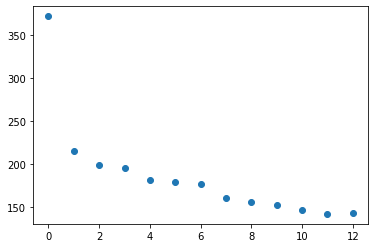

In [86]:
plt.scatter(range(len(train_loss_arr)), train_loss_arr);


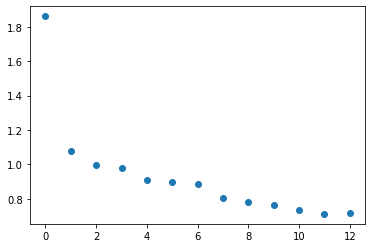

In [87]:
plt.scatter(range(len(train_acc_arr)), train_acc_arr);


In [88]:
from sklearn.metrics import r2_score


In [89]:
model.eval()
with torch.no_grad():
  pred=np.array([])
  #for inputs,_ in X_v_dataloader:      
  for inputs in test_dataloader:   
  #for inputs,_ in train_dataloader_false_shufle:
    model.eval()
    outputs = model(inputs)    
    pred=np.concatenate((pred,outputs.numpy().reshape(-1)),axis=0)

In [90]:
prediction=pd.DataFrame(data={'prediction':pred})
prediction.to_csv("answer.csv", header=None,index=False)

In [91]:
prediction.shape

(4263, 1)

In [92]:
y_train.shape

(17000, 1)